# 전세계 COVID-19 확진자 및 예측

In [1]:
from dateutil.parser import parse
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import itertools
import statsmodels.tsa.api as tsa

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_excel('owid-covid-data.xlsx')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138693,ZWE,Africa,Zimbabwe,2021-12-04,138523.0,1082.0,669.571,4709.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
138694,ZWE,Africa,Zimbabwe,2021-12-05,139046.0,523.0,727.857,4710.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
138695,ZWE,Africa,Zimbabwe,2021-12-06,139046.0,0.0,688.571,4710.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
138696,ZWE,Africa,Zimbabwe,2021-12-07,141601.0,2555.0,996.571,4713.0,3.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
df.drop(columns=['iso_code', 'continent', 'new_cases_smoothed', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million'], inplace=True)
df

,location,date,total_cases,new_cases,total_deaths,new_deaths,people_fully_vaccinated,total_boosters
0,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN
1,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
138693,Zimbabwe,2021-12-04,138523.0,1082.0,4709.0,1.0,2876054.0,NaN
138694,Zimbabwe,2021-12-05,139046.0,523.0,4710.0,1.0,2884043.0,NaN
138695,Zimbabwe,2021-12-06,139046.0,0.0,4710.0,0.0,2892364.0,NaN
138696,Zimbabwe,2021-12-07,141601.0,2555.0,4713.0,3.0,2910951.0,NaN


In [5]:
df.columns

Index(['location', 'date', 'total_cases', 'new_cases', 'total_deaths',
       'new_deaths', 'people_fully_vaccinated', 'total_boosters'],
      dtype='object')

In [6]:
df1 = df.groupby('date')[['total_cases', 'new_cases', 'total_deaths',
       'new_deaths', 'people_fully_vaccinated', 'total_boosters']].sum().reset_index()
df1

,date,total_cases,new_cases,total_deaths,new_deaths,people_fully_vaccinated,total_boosters
0,2020-01-01,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
1,2020-01-02,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
2,2020-01-03,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
3,2020-01-04,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
4,2020-01-05,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...
703,2021-12-04,1.109640e+09,2257147.0,21849654.0,22802.0,1.256831e+10,1.154946e+09
704,2021-12-05,1.111507e+09,1867545.0,21879083.0,29429.0,1.281663e+10,1.164269e+09
705,2021-12-06,1.114106e+09,2598423.0,21909030.0,29947.0,1.286877e+10,1.185693e+09
706,2021-12-07,1.117197e+09,3091289.0,21944571.0,35541.0,1.239750e+10,1.143363e+09


In [7]:
total = df1['new_cases'].sum()
print("총 확진자: ", round(total))
total1 = df1['new_deaths'].sum()
print("총 사망자: ", round(total1))

총 확진자:  1118109972
총 사망자:  21910256


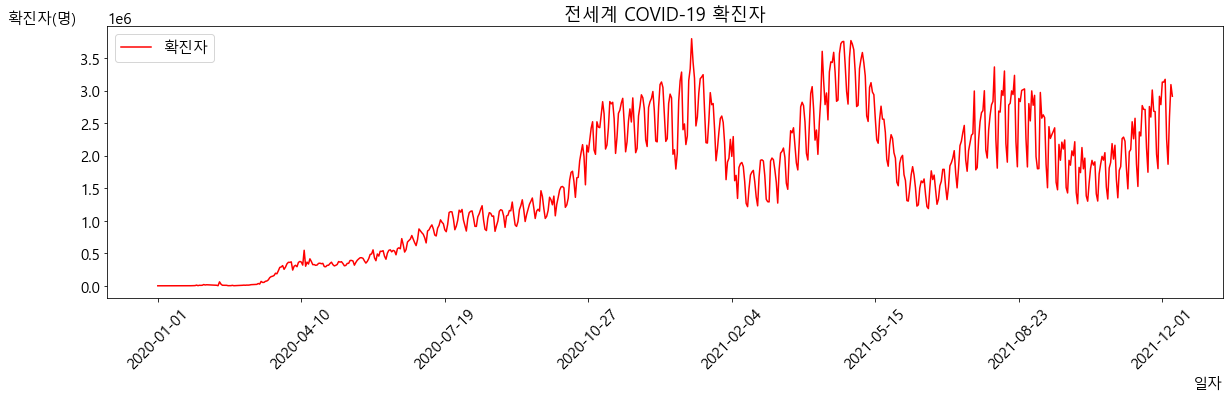

In [8]:
df1.plot('date', 'new_cases', title='전세계 COVID-19 확진자', color='r', figsize=(20, 5), label='확진자')
plt.legend(loc='upper left')
plt.xlabel('일자', loc = 'right')
plt.xticks(rotation=45)
plt.ylabel('확진자(명)', rotation=0, loc='top');

In [9]:
df1['date'] = pd.to_datetime(df1['date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     708 non-null    datetime64[ns]
 1   total_cases              708 non-null    float64       
 2   new_cases                708 non-null    float64       
 3   total_deaths             708 non-null    float64       
 4   new_deaths               708 non-null    float64       
 5   people_fully_vaccinated  708 non-null    float64       
 6   total_boosters           708 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 38.8 KB


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     708 non-null    datetime64[ns]
 1   total_cases              708 non-null    float64       
 2   new_cases                708 non-null    float64       
 3   total_deaths             708 non-null    float64       
 4   new_deaths               708 non-null    float64       
 5   people_fully_vaccinated  708 non-null    float64       
 6   total_boosters           708 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 38.8 KB


In [11]:
df1_time = pd.pivot_table(data = df1, index = 'date', values = 'new_cases', aggfunc = 'sum')
df1_time.head()

,new_cases
date,
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
2020-01-05,0.0


In [12]:
df1_time.reset_index()
df1_time

,new_cases
date,
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
2020-01-05,0.0
...,...
2021-12-04,2257147.0
2021-12-05,1867545.0
2021-12-06,2598423.0


In [13]:
y = df1_time['new_cases'].resample('1D').mean()

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
plt.show()

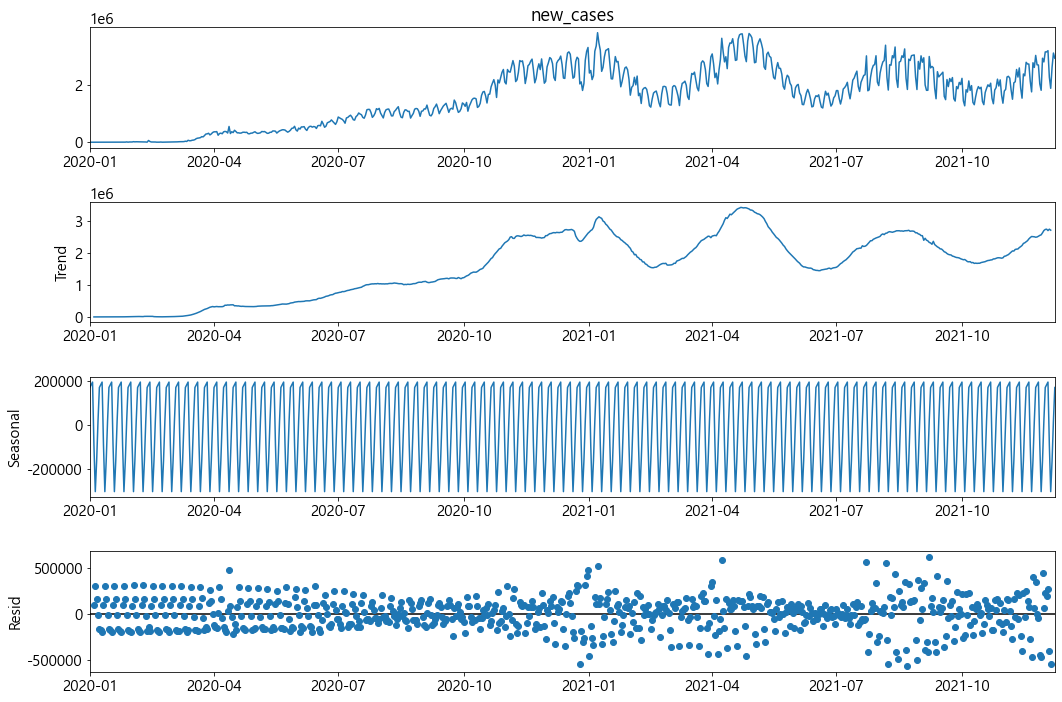

In [16]:
ms = tsa.seasonal_decompose(y, model='additive')
fig = ms.plot()

In [17]:
p = d = q =range (0, 2)
pdq = list(itertools.product(p, d, q))
season_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [18]:
season_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [19]:
p_list = []
p_season_list = []
results_AIC_list = []

In [20]:
for param in pdq:
    for p_season in season_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y,order = param,
                                        seasonal_order = p_season,
                                        enforce_stationarity = False,
                                        enforce_inveribility = False)
            results = mod.fit()
            p_list.append(param)
            p_season_list.append(p_season)
            results_AIC_list.append(results.aic)
        except:
            continue

C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [21]:
ARIMA_list = pd.DataFrame({'Parameter':p_list,'Seasonal':p_season_list,'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

In [22]:
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC
47,"(1, 0, 1)","(1, 1, 1, 12)",19165.958097
43,"(1, 0, 1)","(0, 1, 1, 12)",19177.253026
23,"(0, 1, 0)","(1, 1, 1, 12)",19210.775742
63,"(1, 1, 1)","(1, 1, 1, 12)",19212.133709
59,"(1, 1, 1)","(0, 1, 1, 12)",19214.826331
...,...,...,...
12,"(0, 0, 1)","(1, 0, 0, 12)",21408.211119
9,"(0, 0, 1)","(0, 0, 1, 12)",21410.024132
1,"(0, 0, 0)","(0, 0, 1, 12)",21619.252084
8,"(0, 0, 1)","(0, 0, 0, 12)",21900.364869


In [23]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          new_cases   No. Observations:                  708
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -9601.067
Date:                            Sun, 12 Dec 2021   AIC                          19212.134
Time:                                    20:57:44   BIC                          19234.752
Sample:                                01-01-2020   HQIC                         19220.888
                                     - 12-08-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4993      0.135      3.690      0.000       0.234       0.764
ma.L1         -0.8305      0.095   

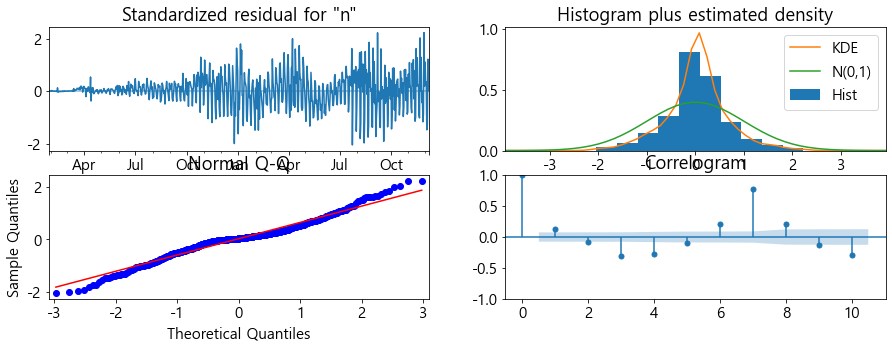

In [24]:
results.plot_diagnostics(figsize=(15, 5));

In [25]:
results.get_prediction();

In [26]:
y.head()

date
2020-01-01    0.0
2020-01-02    0.0
2020-01-03    0.0
2020-01-04    0.0
2020-01-05    0.0
Freq: D, Name: new_cases, dtype: float64

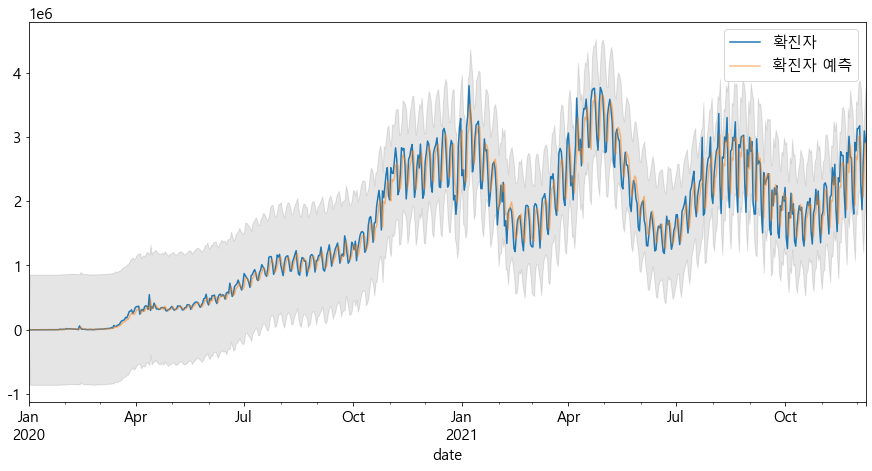

In [28]:
prediction = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
prediction_c = prediction.conf_int()

ax = y.plot(label='확진자')
prediction.predicted_mean.plot(ax=ax, label='확진자 예측', alpha=.5, figsize=(15, 7))
ax.fill_between(prediction_c.index,prediction_c.iloc[:, 0],prediction_c.iloc[:, 1], color='k', alpha=.1)

plt.legend();

In [34]:
prediction = results.get_prediction(start=pd.to_datetime('2021-01-01'), dynamic=False)
pd.DataFrame(prediction.predicted_mean).reset_index();

In [35]:
y_forecast = prediction.predicted_mean
y_truth = y['2020-01-01':]
mse = ((y_forecast - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 120330837760.94


In [36]:
prediction_u = results.get_forecast(steps=100)

In [37]:
prediction_u.predicted_mean

2021-12-09    2.909550e+06
2021-12-10    2.893347e+06
2021-12-11    2.712173e+06
2021-12-12    2.718564e+06
2021-12-13    2.663474e+06
                  ...     
2022-03-14    2.722061e+06
2022-03-15    2.722169e+06
2022-03-16    2.722198e+06
2022-03-17    2.722298e+06
2022-03-18    2.722449e+06
Freq: D, Name: predicted_mean, Length: 100, dtype: float64

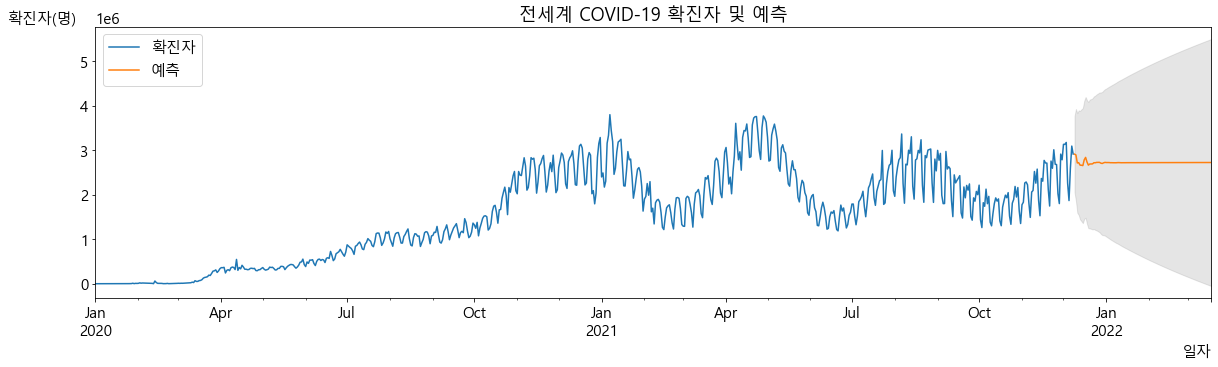

In [39]:
prediction_u = results.get_forecast(steps=100)
prediction_c = prediction_u.conf_int()
ax = y.plot(label='확진자', figsize=(20, 5))
prediction_u.predicted_mean.plot(ax=ax, label='예측')
ax.fill_between(prediction_c.index,
                 prediction_c.iloc[:, 0],
                 prediction_c.iloc[:, 1], color='grey', alpha=.2)

plt.title('전세계 COVID-19 확진자 및 예측')
plt.legend(loc='upper left')
plt.xlabel('일자', loc = 'right')
plt.ylabel('확진자(명)', rotation=0, loc='top')

plt.savefig('전세계 확진자 및 예측.png', dpi=100);